## GERMLINE VARIANTS ANALYSIS: VAF

In [36]:
# Needed basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [37]:
germline_df = pd.read_csv("/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/haplotypecaller/AB9766/AB9766.haplotypecaller.filtered.vcf.gz", sep = "\t", comment='#', header=None)

In [38]:
germline_df.head()

,0,1,2,3,4,5,6,7,8,9
0,chr1,13273,.,G,C,1444.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.096;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:120,63:183:99:1452,0,3326"
1,chr1,13417,.,C,CGAGA,1842.60,CNN_1D_INDEL_Tranche_99.40_100.00,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.501;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:96,51:147:99:1850,0,3843"
2,chr1,13813,.,T,G,114.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-5.261;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:90,16:106:99:122,0,3424"
3,chr1,13838,rs200683566,C,T,503.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=5.055;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:110,23:133:99:511,0,2959"
4,chr1,14599,.,T,A,146.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.384;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:158,15:173:99:154,0,6545"


%%bash
zcat AB9766.haplotypecaller.filtered.vcf.gz | grep -c '#' 
returns 5235861 variants

In [39]:
# Rename columns
germline_df.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'patient1_AB9766']

In [40]:
# Filter variants that pass quality flters
germline_filt_df = germline_df[germline_df['FILTER'] == 'PASS']
len(germline_filt_df) # see that the number of variants has been reduced

5172579

In [41]:
# 1/ Split normal sample info from columns using ":" separator and add in new columns
germline_filt_df = pd.concat([germline_filt_df, germline_filt_df['patient1_AB9766'].str.split(':', expand=True)], axis=1)

# 2/ Rename new columns according to FORMAT column in original data 
germline_filt_df = germline_filt_df.rename(columns={0:'GT', 1: 'AD', 2:'DP', 3: 'GQ', 4:'PL'})

In [42]:
germline_filt_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,GT,AD,DP,GQ,PL
0,chr1,13273,.,G,C,1444.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.096;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:120,63:183:99:1452,0,3326",0/1,"120,63",183,99,"1452,0,3326"
2,chr1,13813,.,T,G,114.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-5.261;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:90,16:106:99:122,0,3424",0/1,"90,16",106,99,"122,0,3424"
3,chr1,13838,rs200683566,C,T,503.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=5.055;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:110,23:133:99:511,0,2959",0/1,"110,23",133,99,"511,0,2959"
4,chr1,14599,.,T,A,146.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.384;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:158,15:173:99:154,0,6545",0/1,"158,15",173,99,"154,0,6545"
5,chr1,14604,.,A,G,167.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.322;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:165,16:181:99:175,0,6793",0/1,"165,16",181,99,"175,0,6793"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235856,chrY,56887491,.,C,A,120.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.262;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:43,8:51:99:128,0,1390",0/1,"43,8",51,99,"128,0,1390"
5235857,chrY,56887503,.,G,T,55.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=1.086;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:43,6:49:63:63,0,1327",0/1,"43,6",49,63,"63,0,1327"
5235858,chrY,56887583,rs77686620,G,A,1261.06,PASS,AC=2;AF=1.00;AN=2;CNN_1D=3.216;DB;DP=42;Excess...,GT:AD:DP:GQ:PL,"1/1:0,34:34:99:1275,102,0",1/1,"0,34",34,99,"1275,102,0"
5235859,chrY,56887837,.,G,A,37.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=2.451;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:13,2:15:45:45,0,519",0/1,"13,2",15,45,"45,0,519"


In [43]:
# Split allele depth frequency column information so it contains reference or alternative allele depth information
germline_filt_df = pd.concat([germline_filt_df, germline_filt_df['AD'].str.split(',', expand=True)], axis=1)
germline_filt_df = germline_filt_df.rename(columns={0:'AD_ref', 1: 'AD_alt'})
germline_filt_df.columns
germline_filt_df = germline_filt_df.drop([2], axis=1) # delete extra columns

In [44]:
# Prior to VAF calculation check data type of AD_alt and DP to see if transformation is necessary
germline_filt_df.dtypes

CHROM               object
POS                  int64
ID                  object
REF                 object
ALT                 object
QUAL               float64
FILTER              object
INFO                object
FORMAT              object
patient1_AB9766     object
GT                  object
AD                  object
DP                  object
GQ                  object
PL                  object
AD_ref              object
AD_alt              object
dtype: object

In [45]:
# Calculate VAF and add it as new column (VAF = number of mutation alternative reads / total depth of the position)
germline_filt_df[['AD_alt','DP']] = germline_filt_df[['AD_alt','DP']].astype(float)
germline_filt_df['VAF'] = germline_filt_df['AD_alt'] / germline_filt_df['DP']  # obtain the VAF frequency of each allele
germline_filt_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,GT,AD,DP,GQ,PL,AD_ref,AD_alt,VAF
0,chr1,13273,.,G,C,1444.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.096;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:120,63:183:99:1452,0,3326",0/1,"120,63",183.0,99,"1452,0,3326",120,63.0,0.344262
2,chr1,13813,.,T,G,114.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-5.261;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:90,16:106:99:122,0,3424",0/1,"90,16",106.0,99,"122,0,3424",90,16.0,0.150943
3,chr1,13838,rs200683566,C,T,503.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=5.055;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:110,23:133:99:511,0,2959",0/1,"110,23",133.0,99,"511,0,2959",110,23.0,0.172932
4,chr1,14599,.,T,A,146.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.384;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:158,15:173:99:154,0,6545",0/1,"158,15",173.0,99,"154,0,6545",158,15.0,0.086705
5,chr1,14604,.,A,G,167.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.322;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:165,16:181:99:175,0,6793",0/1,"165,16",181.0,99,"175,0,6793",165,16.0,0.088398


In [46]:
# Apply function to discriminate mutation type
def muttype(row):
    # Infer mutation type
    if len(row['ALT']) != len(row['REF']):
        return 'INDEL'
    elif len(row['ALT']) == len(row['REF']) and len(row['REF']) > 1:
        return 'MNV'
    else:
        return 'SNV'

germline_filt_df['mut_type'] = germline_filt_df.progress_apply(muttype, axis=1)

  0%|          | 0/5172579 [00:00<?, ?it/s]

In [47]:
germline_filt_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,GT,AD,DP,GQ,PL,AD_ref,AD_alt,VAF,mut_type
0,chr1,13273,.,G,C,1444.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.096;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:120,63:183:99:1452,0,3326",0/1,"120,63",183.0,99,"1452,0,3326",120,63.0,0.344262,SNV
2,chr1,13813,.,T,G,114.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-5.261;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:90,16:106:99:122,0,3424",0/1,"90,16",106.0,99,"122,0,3424",90,16.0,0.150943,SNV
3,chr1,13838,rs200683566,C,T,503.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=5.055;CNN_1D=-...,GT:AD:DP:GQ:PL,"0/1:110,23:133:99:511,0,2959",0/1,"110,23",133.0,99,"511,0,2959",110,23.0,0.172932,SNV
4,chr1,14599,.,T,A,146.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.384;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:158,15:173:99:154,0,6545",0/1,"158,15",173.0,99,"154,0,6545",158,15.0,0.086705,SNV
5,chr1,14604,.,A,G,167.64,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.322;CNN_1D=...,GT:AD:DP:GQ:PL,"0/1:165,16:181:99:175,0,6793",0/1,"165,16",181.0,99,"175,0,6793",165,16.0,0.088398,SNV


# Represent VAF in germline mutations that passed filters

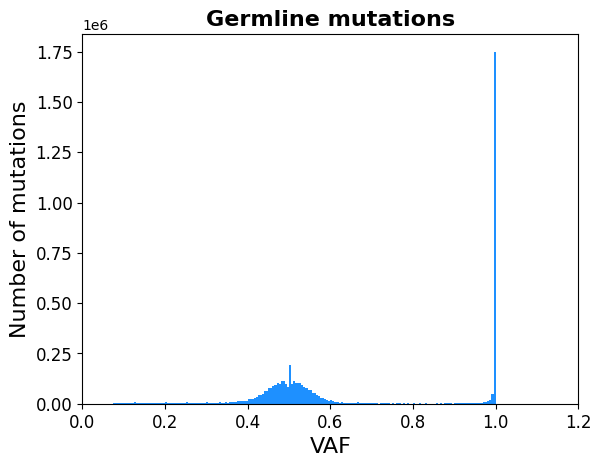

In [48]:
# Represent VAF in histogram
plt.hist(germline_filt_df['VAF'].tolist(), bins = 200, color = 'dodgerblue')
plt.xlim([0,1.2])
plt.ylabel('Number of mutations',  fontsize=16)
plt.xlabel('VAF',  fontsize=16)
plt.title('Germline mutations',  fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/workspace/projects/sjd_melos/exports_images/Germline_VAF.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show()

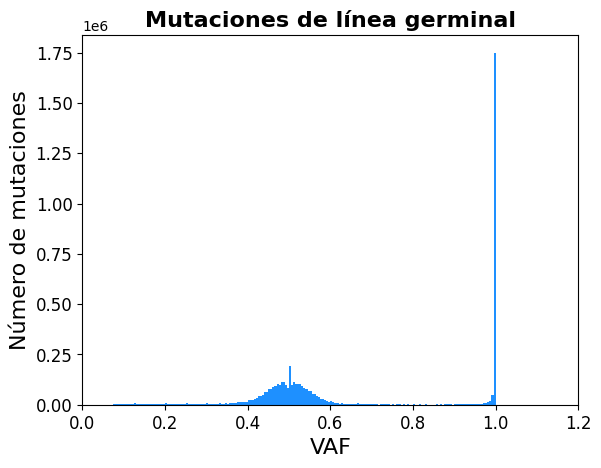

In [49]:
# Represent VAF in histogram

plt.hist(germline_filt_df['VAF'].tolist(), bins = 200, color = 'dodgerblue')
plt.xlim([0,1.2])
plt.ylabel('Número de mutaciones',  fontsize=16)
plt.xlabel('VAF',  fontsize=16)
plt.title('Mutaciones de línea germinal',  fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/workspace/projects/sjd_melos/exports_images/vaf_germinal.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show()

In [50]:
# Export the list of germline mutations into a CSV table
germline_filt_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Germline_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")